<a href="https://colab.research.google.com/github/wiktor1468/TitanicNeuralNetwork/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

18.03

# Workflow stages:
1. Exploration of data
* Identify numerical, categorical, and alphanumeric features
* Understdanding structure and contest
2. Missing data
* Percentage of missing data in each column
* Implement strategies such as imputation or exclusion
3. Data Preprocessing and Feature Engineering
* Categorize data and encode categorical features
* Grouping titles from names and creating new features like AgeGroup
* Normalization data for better results
4. Data Visualization
* Visualize relationships between different features and survival using plots and correlation heatmaps
* Analyze survival rates based on features
5. Building Neural Network Model
* Prepare the dataset for training by splitting it into train and test set
* Build a neural network model using Keras
* Define the number of layers, activation functions, and dropout layers
* Adding to model appropriate loss function and optimizer
* Train the model
* Evaluate the model's performance using accuracy, precision, recall
* Interpret the results
6. Conclusion and potential Improvements
* Summarize the findings from the analysis
* Describing potential areas which can be improved, such as other feature engineering or more advanced modeling techniques.



# Workflow goals
I am aiming to develop a predictive model that can classify passengers into survival categories based on their characteristics. This involves thorough **data exploration, feature engineering, model building, and evaluation** to ensure the model's reliability and effectiveness in making predictions.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


test = pd.read_csv("/content/drive/MyDrive/ML/titanic/test.csv")
train = pd.read_csv("/content/drive/MyDrive/ML/titanic/train.csv")

train.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

**Categorical Features:** Survived, Sex, Embarked, Pclass

**Alphanumeric Features:** Ticket, Cabin

In [ ]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


##Percent of missing data

In [ ]:
#check for  unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Count the number of missing values in each column
missing_age_count = train['Age'].isnull().sum()
missing_cabin_count = train['Cabin'].isnull().sum()
missing_embark_count = train['Embarked'].isnull().sum()

# Count the total number of rows in the DataFrame
total_passengers = train.shape[0]

# Calculate the percentage of passengers without age information
percent_missing_age = (missing_age_count / total_passengers) * 100
percent_missing_cabin = (missing_cabin_count / total_passengers) * 100
percent_missing_embark = (missing_embark_count / total_passengers) * 100

print(f"Percentage of passengers without age information: {percent_missing_age:}%")
print(f"Percentage of passengers without cabin information: {percent_missing_cabin:}%")
print(f"Percentage of passengers without embarked information: {percent_missing_embark:}%")


Percentage of passengers without age information: 19.865319865319865%
Percentage of passengers without cabin information: 77.10437710437711%
Percentage of passengers without embarked information: 0.22446689113355783%


##Kategoryzacja danych

In [ ]:
full = pd.concat([train , test]) # concatenate two dataframes
#give them category
full['_Sex'] = pd.Categorical(full.Sex).codes
full['_Embarked'] = pd.Categorical(full.Embarked).codes


full['_AgeGroup'] = pd.Categorical(full.AgeGroup).codes




full['_CabinType'] = pd.Categorical(full['Cabin'].astype(str).str[0]).codes# first letter of cabin (8- NaN)


full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,_Sex,_Embarked,_AgeGroup,_CabinType
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,1,2,4,8
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0,0,6,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,2,5,8
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,0,2,5,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,1,2,5,8


<Axes: >

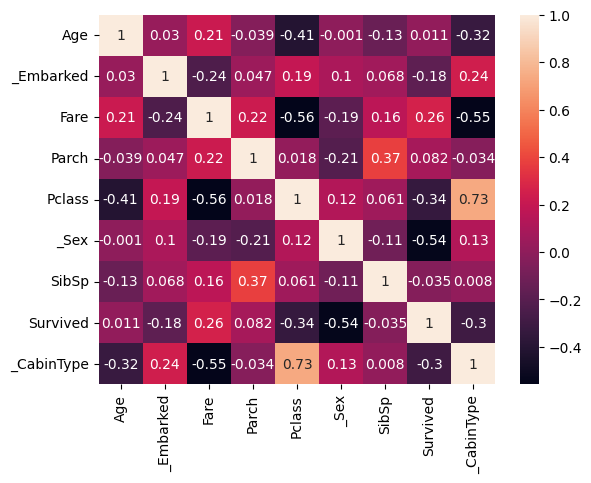

In [ ]:
cols = ['Age','_Embarked','Fare','Parch','Pclass','_Sex','SibSp','Survived','_CabinType']
corr = full[cols].corr()
sns.heatmap(corr, annot=True)

The biggest impact might have: type of cabine, sex, fare and siblings

##Title grouping

In [ ]:
pat = r",\s([^ .]+)\.?\s+"

full['Title'] =  full['Name'].str.extract(pat,expand=True)[0]
full.groupby('Title')['Title'].count()

Title
Capt          1
Col           4
Don           1
Dona          1
Dr            8
Jonkheer      1
Lady          1
Major         2
Master       61
Miss        260
Mlle          2
Mme           1
Mr          757
Mrs         197
Ms            2
Rev           8
Sir           1
the           1
Name: Title, dtype: int64

In [ ]:
#most common categories

#.loc[]: This is used to access a group of rows and columns
#= 'Miss': This assigns the value ' to the selected rows


full.loc[full['Title'].isin(['Mlle','Ms','Lady']),'Title'] = 'Miss'
full.loc[full['Title'].isin(['Mme']),'Title'] = 'Mrs'
full.loc[full['Title'].isin(['Sir']),'Title'] = 'Mr'
full.loc[~full['Title'].isin(['Miss','Master','Mr','Mrs']),'Title'] = 'Other' # NOT IN, if they arent in above groups => others
full['_Title'] = pd.Categorical(full.Title).codes
full.groupby('Title')['Title'].count()

Title
Master     61
Miss      265
Mr        758
Mrs       198
Other      27
Name: Title, dtype: int64

In [ ]:
#How many person have the same yticket number
full['TicketCounts'] = full.groupby(['Ticket'])['Ticket'].transform('count')
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,_Sex,_Embarked,_AgeGroup,_CabinType,Title,_Title,TicketCounts
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,1,2,4,8,Mr,2,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0,0,6,2,Mrs,3,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,2,5,8,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,0,2,5,2,Mrs,3,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,1,2,5,8,Mr,2,1


## Data Visualization

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


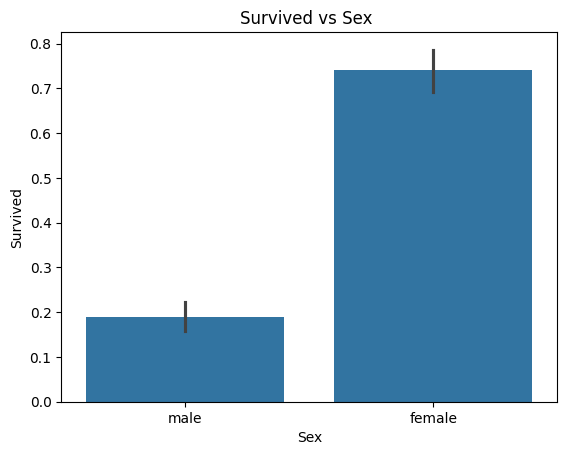

In [ ]:
sns.barplot(x="Sex", y="Survived", data=train)
plt.title('Survived vs Sex ')

women = train.loc[train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

##Bar plot of survival by Pclass

Percentage of Pclass 1 who survived: 62.96296296296296
Percentage of Pclass 2 who survived: 47.28260869565217
Percentage of Pclass 3 who survived: 24.236252545824847


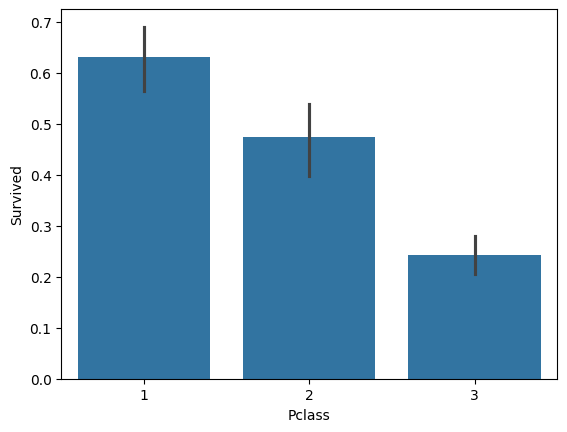

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=train)

print("Percentage of Pclass 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)#.value_counts(normalize=True): counts the occurrences of each unique value in the selected column and normalizes the result to show proportions instead of raw counts

print("Percentage of Pclass 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

People with higher Pcclass had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

# SibSp vs. survival

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp > 2 who survived: 15.217391304347828


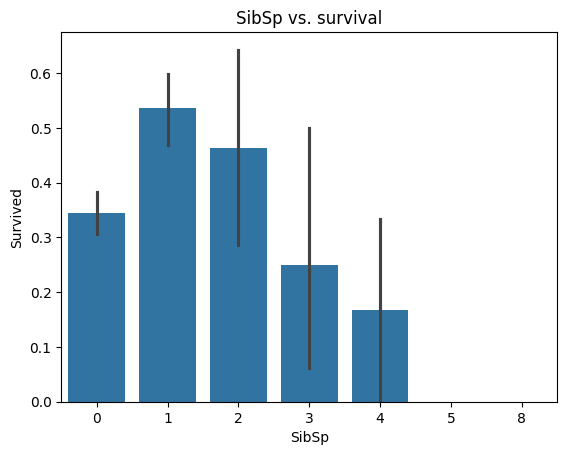

In [ ]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)
plt.title('SibSp vs. survival')

print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)# normalizes the result to show proportions instead of raw counts

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp > 2 who survived:", train["Survived"][train["SibSp"] > 2].value_counts(normalize = True)[1]*100)


 People with no siblings were less likely to survive than those with one or two but people with more than 2 siblings were the least likley to survive

##Survived vs parch

Text(0.5, 1.0, 'Survived vs parch')

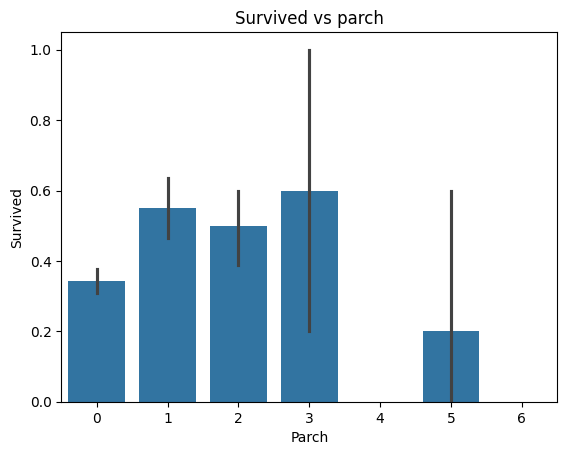

In [ ]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.title('Survived vs parch')

People traveling alone are less likely to survive than those with 1-3 parents or children

#Survived vs age

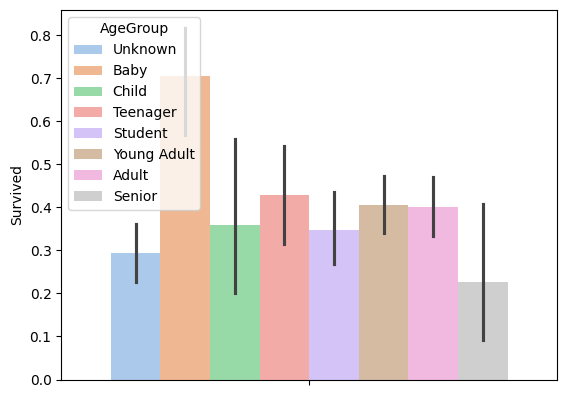

In [ ]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5) #fills missing values in the age column with -0.5
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] #boundaries for different age groups
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels) #new column named "AgeGroup", categorizing ages into the specified bins and labeling them
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)



#draw a bar plot of Age vs. survival
sns.barplot(hue="AgeGroup", y="Survived", data=train, palette='pastel',legend=True , linewidth=4  )
plt.show()

Babies has the biggest chance to survive

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


#Zajecia 2 (25.03)

In [ ]:
#missing data
print(pd.isnull(full).sum())

PassengerId        0
Survived         418
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin           1014
Embarked           2
AgeGroup           0
_Sex               0
_Embarked          0
_AgeGroup          0
_CabinType         0
Title              0
_Title             0
TicketCounts       0
dtype: int64


 Age = 0 ponieważ osobom nieznanym przypisałem wartość -0.5 aby móc zkategoryzować wiek (AgeGroup)

##Filling embarked

In [ ]:
full[full['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,_Sex,_Embarked,_AgeGroup,_CabinType,Title,_Title,TicketCounts
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Adult,0,-1,6,1,Miss,1,2
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Senior,0,-1,7,1,Mrs,3,2


correlation of embarked

In [ ]:
abs(full[cols].corr()['_Embarked']).sort_values(ascending=False)


_Embarked     1.000000
_CabinType    0.242810
Fare          0.241442
Pclass        0.192867
Survived      0.176509
_Sex          0.104818
SibSp         0.067802
Parch         0.046957
Age           0.029512
Name: _Embarked, dtype: float64

Największa korelacja zachodzi pomiędzy typem kabiny (0.243)

Wiemy, że te osoby znajdowały się w kabinie 'B'

Wiemy też, że fare=80

##Fare and embarked

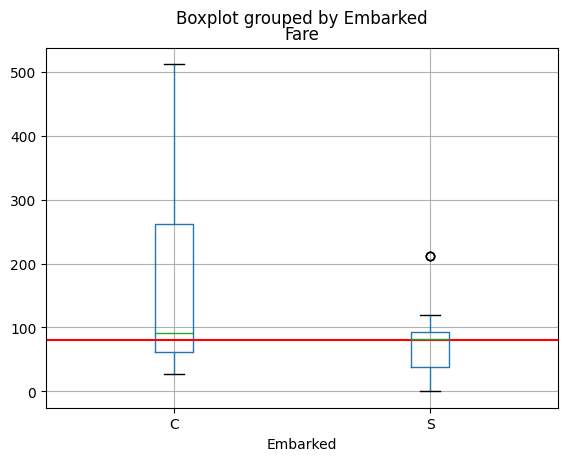

In [ ]:
val = full[  (full['Pclass'] == 1)
     & (full['_CabinType'] == 1)
     ][['Fare','Embarked']];


ax = val.boxplot(column='Fare',by='Embarked');
ax.axhline(80,color='red')

Ceny w porcie S są mniej 'rozstrzelone', więc port ten port zostanie im przypisany

In [ ]:
full.at[61, 'Embarked'] = 'S'
full.loc[829, 'Embarked'] = 'S'
full['_Embarked'] = pd.Categorical(full.Embarked).codes #actual value


In [ ]:
full.head(831)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,_Sex,_Embarked,_AgeGroup,_CabinType,Title,_Title,TicketCounts
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,1,2,4,8,Mr,2,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0,0,6,2,Mrs,3,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,2,5,8,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,0,2,5,2,Mrs,3,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,1,2,5,8,Mr,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,827,0.0,3,"Lam, Mr. Len",male,-0.5,0,0,1601,56.4958,NaN,S,Unknown,1,2,0,8,Mr,2,8
827,828,1.0,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C,Baby,1,0,1,8,Master,0,3
828,829,1.0,3,"McCormack, Mr. Thomas Joseph",male,-0.5,0,0,367228,7.7500,NaN,Q,Unknown,1,1,0,8,Mr,2,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,S,Senior,0,2,7,1,Mrs,3,2


##Filling fare

In [ ]:
full[full['Fare'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,_Sex,_Embarked,_AgeGroup,_CabinType,Title,_Title,TicketCounts
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Senior,1,2,7,8,Mr,2,1


### correlation of fare

In [ ]:
abs(full[cols].corr()['Fare']).sort_values(ascending=False)

Fare          1.000000
Pclass        0.558629
_CabinType    0.547292
Survived      0.257307
_Embarked     0.238005
Parch         0.221539
Age           0.214725
_Sex          0.185523
SibSp         0.160238
Name: Fare, dtype: float64

największa korelacja zachodzi z Pclass, więc sprawdzimy ile kosztował bilet w Pclas=3, Parch=0, sex= male oraz ageGroup

In [ ]:
val = full[  (full['Pclass'] == 3)
     & (full['Embarked'] == 'S')
     & (full['Parch'] == 0)
     & (full['Sex'] == 'male')
     & (full['AgeGroup'] =='Senior')
      ][['Age','Fare']];
val.groupby('Age').agg(['min','max','count','mean','median'])

Fare                              
         min     max count    mean  median
Age                                       
60.5     NaN     NaN     0     NaN     NaN
61.0  6.2375  6.2375     1  6.2375  6.2375
74.0  7.7750  7.7750     1  7.7750  7.7750

osoby w tym wieku średnio płaciły między 6 a 7 funtów. Możemy w takim razie przyjąć średnią z tych dwóch wartości. Różnica między 6 a 7 jest zbyt mała aby mieć istotny wpływ na nasze obliczenia

In [ ]:
print(full.iloc[1043])


PassengerId                   1044
Survived                       NaN
Pclass                           3
Name            Storey, Mr. Thomas
Sex                           male
Age                           60.5
SibSp                            0
Parch                            0
Ticket                        3701
Fare                           NaN
Cabin                          NaN
Embarked                         S
AgeGroup                    Senior
_Sex                             1
_Embarked                        2
_AgeGroup                        7
_CabinType                       8
Title                           Mr
_Title                           2
TicketCounts                     1
Name: 152, dtype: object


In [ ]:
full.at[152, 'Fare'] = (6.2375+7.7750)/2

In [ ]:
full.head(1045)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,_Sex,_Embarked,_AgeGroup,_CabinType,Title,_Title,TicketCounts
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25000,NaN,S,Student,1,2,4,8,Mr,2,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28330,C85,C,Adult,0,0,6,2,Mrs,3,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92500,NaN,S,Young Adult,0,2,5,8,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10000,C123,S,Young Adult,0,2,5,2,Mrs,3,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05000,NaN,S,Young Adult,1,2,5,8,Mr,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1041,NaN,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.00000,NaN,S,Young Adult,1,2,5,8,Other,4,2
150,1042,NaN,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.15830,C54,C,Student,0,0,4,2,Mrs,3,3
151,1043,NaN,3,"Matinoff, Mr. Nicola",male,-0.5,0,0,349255,7.89580,NaN,C,Unknown,1,0,0,8,Mr,2,1
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.00625,NaN,S,Senior,1,2,7,8,Mr,2,1


##Filling Age

In [ ]:
#!! osoby o nieznanym wieku posiadaja wartość -0.5
print(full.loc[full['Age'] < 0].shape[0])

263


Osób u których brakuje podanego wieku jest 263

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=-0.5, strategy='mean')
full['_AgeImputer'] = imp.fit_transform(full[['Age']])

full.loc[:, '_AgeImputer'] = imp.fit_transform(full[['Age']])

In [ ]:
print(full.loc[full['Age'] < 0].shape[0])

263


In [ ]:
print(full.loc[full['_AgeImputer'] < 0].shape[0])# check if everybody got his predicted age

0


In [ ]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,AgeGroup,_Sex,_Embarked,_AgeGroup,_CabinType,Title,_Title,TicketCounts,_AgeImputer
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Student,1,2,4,8,Mr,2,1,22.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Adult,0,0,6,2,Mrs,3,2,38.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Young Adult,0,2,5,8,Miss,1,1,26.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Young Adult,0,2,5,2,Mrs,3,2,35.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,Young Adult,1,2,5,8,Mr,2,1,35.0


##Filling Cabin

_CabinType= first letter of cabin (8- NaN)

In [ ]:
print('Missing values Percentage for Cabin:\n\n', round(full['Cabin'].isnull().sum() / len(full) * 100, 1))


Missing values Percentage for Cabin:

 77.5


Nie posiadamy wiedzy na temat Cabin u 77,5% pasażerów, więc ta informacja zostanie pominięta  

In [ ]:
pd.set_option('display.max_columns', None)#aby dostać wszystkie kolumny

#Normalization

In [ ]:
from sklearn import preprocessing

In [ ]:
full['_Fare'] = preprocessing.scale(full[['Fare']]) [:,0] #standardizing the data (mean divided by the standard deviation)
#helps in bringing all features to the same magnitude

In [ ]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,_Sex,_Embarked,_AgeGroup,_CabinType,Title,_Title,TicketCounts,_AgeImputer,_Fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,1,2,4,8,Mr,2,1,22.0,-0.503138
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0,0,6,2,Mrs,3,2,38.0,0.734828
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,2,5,8,Miss,1,1,26.0,-0.490088
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,0,2,5,2,Mrs,3,2,35.0,0.383288
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,1,2,5,8,Mr,2,1,35.0,-0.487671


#Budowa sieci neuronowej

In [ ]:
cols = ['Parch','Pclass','SibSp','_Sex','_Embarked','_CabinType','_Title','TicketCounts','_AgeGroup','_Fare']
full[cols]

,Parch,Pclass,SibSp,_Sex,_Embarked,_CabinType,_Title,TicketCounts,_AgeGroup,_Fare
0,0,3,1,1,2,8,2,1,4,-0.503138
1,0,1,1,0,0,2,3,2,6,0.734828
2,0,3,0,0,2,8,1,1,5,-0.490088
3,0,1,1,0,2,2,3,2,5,0.383288
4,0,3,0,1,2,8,2,1,5,-0.487671
...,...,...,...,...,...,...,...,...,...,...
413,0,3,0,1,2,8,2,1,0,-0.487671
414,0,1,0,0,0,2,4,3,6,1.462078
415,0,3,0,1,2,8,2,1,6,-0.503138
416,0,3,0,1,2,8,2,1,0,-0.487671


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
import tensorflow as tf
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
new_df = full.dropna(subset=['Survived'])# train df but with all features from full df

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df[cols], new_df['Survived'], test_size=0.2, random_state=42)


# 1. nowy sekwencyjny model.
model = Sequential()

# 2. Dodaje warstwę gęsto połączoną jako pierwszą warstwę modelu.
model.add(Dense(units=16, input_shape=(len(cols),), activation='relu'))

# 3. Dodaje kolejną warstwę gęsto połączoną z 32 neuronami.
model.add(Dense(units=32, activation='relu', kernel_initializer='glorot_uniform'))

# 4. Dodaje warstwę normalizacji wsadowej, która normalizuje aktywacje
#poprzedniej warstwy na każdym kroku treningu, co pomaga w szybszej
#i bardziej stabilnej konwergencji.
model.add(tf.keras.layers.BatchNormalization())

# 5.Dodaje warstwę Dropout, która wyłącza 20% neuronów losowo w
#trakcie treningu, co pomaga zapobiegać przeuczeniu modelu.
model.add(Dropout(0.2))

# 6.Dodaje jeszcze jedną gęstą warstwę z 64 neuronami.
model.add(Dense(units=64, activation='relu', kernel_initializer='glorot_uniform'))

# 7.Ponownie dodaje warstwę Dropout.
model.add(Dropout(0.2))

# 8. Dodaje jeszcze jedną gęstą warstwę z 32 neuronami.
model.add(Dense(units=32, activation='relu', kernel_initializer='glorot_uniform'))

# 9. Dodaje kolejną warstwę Dropout, tym razem wyłączającą 30% neuronów.
model.add(Dropout(0.3))

# 10. Dodaje warstwę wyjściową z jednym neuronem i funkcją aktywacji sigmoid, która jest odpowiednia dla klasyfikacji binarnej.
model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])



# 12. Fit the model
model.fit(X_train, Y_train, batch_size=32, verbose=2, epochs=50)

model.summary()
predictions = model.predict(X_test)

# 15. model.predict(X_test) używa wytrenowanego modelu do przewidywania
#wyników dla nowego zestawu danych X_test.
#• Ponieważ ostatnia warstwa używa funkcji aktywacji sigmoid, która zwraca
#wartości od 0 do 1, interpretujemy wyniki jako prawdopodobieństwo
#przynależności do klasy 1. Porównując te wartości z progiem 0.5, możemy
#zaklasyfikować każdą próbkę jako 0 (nie przetrwał) lub 1 (przetrwał).
#• (predict > 0.5).astype(int).ravel() konwertuje przewidywane
#prawdopodobieństwa na etykiety klas binarnych (0 lub 1), a ravel() spłaszcza
#tablicę do jednowymiarowej.
predictions = (predictions > 0.5).astype(int).ravel()


Y_pred_rand = (model.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(Y_train,
Y_pred_rand)*100,2))

Epoch 1/50
23/23 - 2s - loss: 0.7464 - acc: 0.5534 - 2s/epoch - 107ms/step
Epoch 2/50
23/23 - 0s - loss: 0.6418 - acc: 0.6629 - 48ms/epoch - 2ms/step
Epoch 3/50
23/23 - 0s - loss: 0.6166 - acc: 0.6629 - 48ms/epoch - 2ms/step
Epoch 4/50
23/23 - 0s - loss: 0.5768 - acc: 0.6840 - 45ms/epoch - 2ms/step
Epoch 5/50
23/23 - 0s - loss: 0.6081 - acc: 0.6840 - 46ms/epoch - 2ms/step
Epoch 6/50
23/23 - 0s - loss: 0.5815 - acc: 0.6952 - 49ms/epoch - 2ms/step
Epoch 7/50
23/23 - 0s - loss: 0.5799 - acc: 0.7135 - 48ms/epoch - 2ms/step
Epoch 8/50
23/23 - 0s - loss: 0.5596 - acc: 0.7135 - 48ms/epoch - 2ms/step
Epoch 9/50
23/23 - 0s - loss: 0.5558 - acc: 0.7374 - 48ms/epoch - 2ms/step
Epoch 10/50
23/23 - 0s - loss: 0.5538 - acc: 0.7303 - 46ms/epoch - 2ms/step
Epoch 11/50
23/23 - 0s - loss: 0.5636 - acc: 0.7163 - 45ms/epoch - 2ms/step
Epoch 12/50
23/23 - 0s - loss: 0.5199 - acc: 0.7542 - 49ms/epoch - 2ms/step
Epoch 13/50
23/23 - 0s - loss: 0.5398 - acc: 0.7528 - 50ms/epoch - 2ms/step
Epoch 14/50
23/23 - 0

In [ ]:
print('Precision : ', np.round(metrics.precision_score(Y_train,
Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(Y_train,
Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(Y_train,
Y_pred_rand)*100,2))


Precision :  85.96
Accuracy :  85.39
Recall :  73.13


#Wnioski

**Wyniki**

Precyzja na poziomie 85.96 określa, ile z przewidzianych jako pozytywne przypadków faktycznie są pozytywne(True Positive)

Dokładność na poziomie 85.39, mówi o  stosunku poprawnie sklasyfikowanych przypadków do wszystkich przypadków

Czułość na poziomie 73.13 określa, jak wiele z rzeczywiście pozytywnych przypadków zostało wykrytych przez model sieci neuronowej







**Uzupełnianie brakujących danych**

Kolumna Age została uzupełniona metodą **imputacji** polegajacą na zastąpieniu brakujących wartości średnią wartością w kolumnie

Kolumna Cabin została pominięta ponieważ ponad 70% osób nie posiadało tej cechy, do procesu projektowania sieci neuronowej została jednak użyta kolumna _CabinType, która uwzględniała brakujące dane. Można podejrzewać, że osoby nie posiadające _CabinType miały mniejsze szanse na przeżycie


Brakujące dane w kolumnie Fare zostały uzupełnione na podstawie analizy korelacji powyższej cechy

Puste wartości kolumny Embarked zostały uzupełnione na podstawie analizy rozkładu cen biletów w zależności od portu. Można zauważyć, że ceny biletów   porcie "S" wykazywały się mniejszą zmiennością , co  mogło sugerować, że pasażerowie podróżujący z tego portu płacili podobne ceny za bilety. Na tej podstawie przypisano puste wartości kolumny "Embarked" do portu "S".

**Analiza istotności cech**

Płeć: Płeć była jedną z najistotniejszych cech w przypadku przeżycia na Titanicu. Statystycznie kobiety miały znacznie większe szanse na przeżycie niż mężczyźni.

Klasa biletu (Pclass): Klasa biletu również miała duże znaczenie. Pasażerowie podróżujący w wyższych klasach mieli większe szanse na przeżycie.

Wiek (Age): Wiek mógł mieć znaczenie, jednak wpływ ten mógł być mniej jednoznaczny.

Rodzina na pokładzie (Parch i SibSp): Pasażerowie podróżujący z rodziną mogli mieć większe szanse na przeżycie.

Opłata za bilet (Fare): Opłata za bilet mogła być również istotnym czynnikiem, przy czym pasażerowie płacący wyższe ceny mogli podróżować w wyższych klasach i mieć większe szanse na przeżycie.



**Potencjalne ulepszenia**

 W projekcie można rozważyć dodanie dodatkowych cech lub przeprowadzenie bardziej zaawansowanych analiz danych(szczegołnie w uzupełnianiu brakujących danych), które mogłyby jeszcze bardziej poprawić wydajność modelu.